Import libraries 

In [2]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import glob
from pathlib import Path
import re
import numpy as np
%matplotlib inline 

In [3]:
path = '/home/bejanca/projects/ks-er/data/' 

In [4]:
data = pd.read_csv(path + 'maps/Batch1.GoldAnnotation.Category.txt', delimiter = ' ', names = ['label', 'file_name'])
data['text'] = data.file_name.apply(lambda x: Path(f'{path}batch1-in-txt/{x}').read_text())
# data.head()

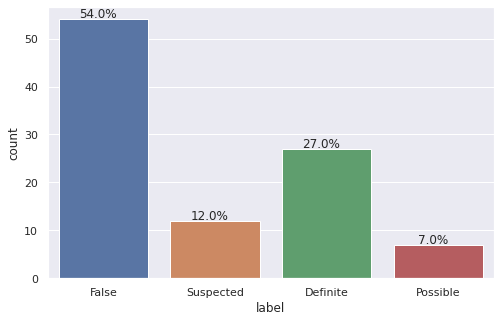

In [5]:
sns.set(style="darkgrid")
plt.figure(figsize=(8,5))
total = float(len(data))
ax = sns.countplot(data = data, x = 'label')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x - 0.45, y+ 0.35),ha='center')
plt.show()

## Data cleaning 

Let's find a word - cut till this word and then remove the line 

In [6]:
data['index'] = data.text.str.find('DOS')

In [10]:
data['index']

0     103
1     157
2      -1
3     161
4     117
     ... 
95     -1
96     -1
97    102
98     -1
99     -1
Name: index, Length: 100, dtype: int64

In [16]:
data.text[0][data.index[0] :10]

'Attending '

In [27]:
# data['clean'] = np.where(data['index'] != -1,  lambda x: data.text.str[data['index']:], data.text)

data['clean'] = np.where(data['index'] != -1,  data['clean'].apply(lambda x: x[data['index']:]), data.text)

data['clean'] = data['clean'].apply(lambda x: re.sub("DOS.*", '', x,  re.DOTALL).strip())

TypeError: 'float' object is not subscriptable

In [ ]:
# data['clean'][0]

In [20]:
data['text'][0][5:]

"ding ID: 94342\nPatient Name: **NAME[AAA, CCC]\nMRN: **ID-NUM\nED Attending: **NAME[ZZZ YYY XXX], MD\nDOS: **DATE[Jan 01 2015]\n\n\nThe patient was seen on **DATE[Jan 01 2015] and **DATE[Jan 02 2015].\n\nRESIDENT NAME:\t**NAME[DDD EEE], M.D.\n\nATTENDING PHYSICIAN STATEMENT:\tI do certify that I have seen and examined this\npatient, do agree with the resident's fin[ID***]for history of present illness,\nreview of systems, past medical history, and physical exam.\n\nCHIEF COMPLAINT:  Multisystem trauma.\n\nHISTORY OF PRESENT ILLNESS:  The patient is a **AGE[in 60s]-year-old female who was a\nrestrained driver involved in a motor vehicle MVC in which she was driving along\na 2-lane highway and struck a trailer off on the side of the road attached to\nthe vehicle.  Somehow or another, her car either flipped or got turned around\nand was struck again.  She was found by EMS in the roadway.  The patient stated\nthat she remembers getting out of the vehicle to check on the driver of the\ntra